In [1]:
import socket
import hashlib
import matplotlib.pyplot as plt
import time
import numpy as np
t0 = time.perf_counter()
serverAddressPort   = ("127.0.0.1", 9801)

bufferSize          = 1500


def sleep(duration, get_now=time.perf_counter):
    now = get_now()
    end = now + duration
    while now < end:
        now = get_now()

# Create a UDP socket at client side

UDPClientSocket = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
UDPClientSocket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
UDPClientSocket.settimeout(0.025)
 
# Send to server using created UDP socket
print(serverAddressPort)
UDPClientSocket.sendto(str.encode("SendSize\nReset\n\n"), serverAddressPort)
print("sent request")
totalsize = 0
while True:
    try:
        msgFromServer = UDPClientSocket.recvfrom(bufferSize)
        print(msgFromServer)
        msg = msgFromServer[0].decode()
        print(msg)
        brokenmessage = msg.split("\n")
        if(brokenmessage[-1] == "" and brokenmessage[-2] == ""):
            if (brokenmessage[0][:4] == "Size"):
                totalsize = int(brokenmessage[0][6:])
        break
    except TimeoutError:
        time.sleep(0.2)
        UDPClientSocket.sendto(str.encode("SendSize\nReset\n\n"), serverAddressPort)


counter  = 0
data = ""

graph_offset_recv = []
graph_time_recv = []
graph_offset_send = []
graph_time_send = []

('127.0.0.1', 9801)
sent request
(b'Size: 888034\n\n', ('127.0.0.1', 9801))
Size: 888034


In [2]:
def fetch_data(batch_size:int, wait_time:float):
    for i in range(batch_size):
        

while counter < totalsize:
    UDPClientSocket.sendto(str.encode("Offset: "+str(counter)+"\nNumBytes: "
                                      +str(min(1448, totalsize - counter))+"\n\n"), serverAddressPort)
    graph_offset_send.append(counter)
    graph_time_send.append(time.perf_counter() - t0)
    while True:
        try:
            msgFromServer = UDPClientSocket.recvfrom(bufferSize)
            msg = msgFromServer[0].decode()
            brokenmessage = msg.split("\n")
            print(counter)
            if(brokenmessage[2] == ""):
                if (brokenmessage[0][:6] == "Offset"):
                    offset = int(brokenmessage[0][8:])
                    print("offset:" + str(offset))
                    packsize = int(brokenmessage[1][10:])
                    print("packetsize: "+str(packsize))
                    print(len(msg) - (len(brokenmessage[0])+len(brokenmessage[1])+3))
                    if (offset == counter and (len(msg) - (len(brokenmessage[0])+len(brokenmessage[1])+3))== packsize):
                        data += msg[len(brokenmessage[0]) +len(brokenmessage[1])+3:]
                        graph_offset_recv.append(offset)
                        graph_time_recv.append(time.perf_counter() - t0)
                        counter += packsize
                        sleep(0.00245)
                        break
                    else:
                        sleep(0.002)
                        UDPClientSocket.sendto(str.encode("Offset: "+str(counter)+"\nNumBytes: "+str(min(1448,totalsize - counter))+"\n\n"), serverAddressPort)

                else:
                    sleep(0.002)
                    UDPClientSocket.sendto(str.encode("Offset: "+str(counter)+"\nNumBytes: "+str(min(1448,totalsize - counter))+"\n\n"), serverAddressPort)
            else:
                sleep(0.002)
                UDPClientSocket.sendto(str.encode("Offset: "+str(counter)+"\nNumBytes: "+str(min(1448,totalsize - counter))+"\n\n"), serverAddressPort)
            
            
        except TimeoutError:
            sleep(0.003)
            UDPClientSocket.sendto(str.encode("Offset: "+str(counter)+"\nNumBytes: "+str(min(1448,totalsize - counter))+"\n\n"), serverAddressPort)


0
offset:0
packetsize: 1448
1448
1448
offset:1448
packetsize: 1448
1448
2896
offset:2896
packetsize: 1448
1448
4344
offset:4344
packetsize: 1448
1448
5792
offset:5792
packetsize: 1448
1448
7240
offset:7240
packetsize: 1448
1448
8688
offset:8688
packetsize: 1448
1448
10136
offset:10136
packetsize: 1448
1448
11584
offset:11584
packetsize: 1448
1448
13032
offset:13032
packetsize: 1448
1448
14480
offset:14480
packetsize: 1448
1448
15928
offset:15928
packetsize: 1448
1448
17376
offset:17376
packetsize: 1448
1448
18824
offset:18824
packetsize: 1448
1448
20272
offset:20272
packetsize: 1448
1448
21720
offset:21720
packetsize: 1448
1448
23168
offset:23168
packetsize: 1448
1448
24616
offset:24616
packetsize: 1448
1448
26064
offset:26064
packetsize: 1448
1448
27512
offset:27512
packetsize: 1448
1448
28960
offset:28960
packetsize: 1448
1448
30408
offset:30408
packetsize: 1448
1448
31856
offset:31856
packetsize: 1448
1448
33304
offset:33304
packetsize: 1448
1448
34752
offset:34752
packetsize: 1448


In [3]:

md5 = hashlib.md5(data.encode()).hexdigest()
print(md5)
print(type(md5))
print(len(data))
UDPClientSocket.sendto(str.encode("Submit: 2021CS50622@myteam\nMD5: "+md5+"\n\n"), serverAddressPort)
while True:
    try:
        msgFromServer = UDPClientSocket.recvfrom(bufferSize)
        msg = msgFromServer[0].decode()
        print(msg)
        brokenmessage = msg.split("\n")
        if(brokenmessage[len(brokenmessage)-1] == "" and brokenmessage[len(brokenmessage)-2] == ""):
            if (brokenmessage[0][:4] == "Size"):
                totalsize = int(brokenmessage[0][6:])
        break
    except:
        time.sleep(0.2)
        UDPClientSocket.sendto(str.encode("Submit: testing\n"+str(md5)+"\n\n"), serverAddressPort)

e3bbc751e4a2de7561b13e211d8a4a80
<class 'str'>
888034
Result: true
Time: 4946
Penalty: 31


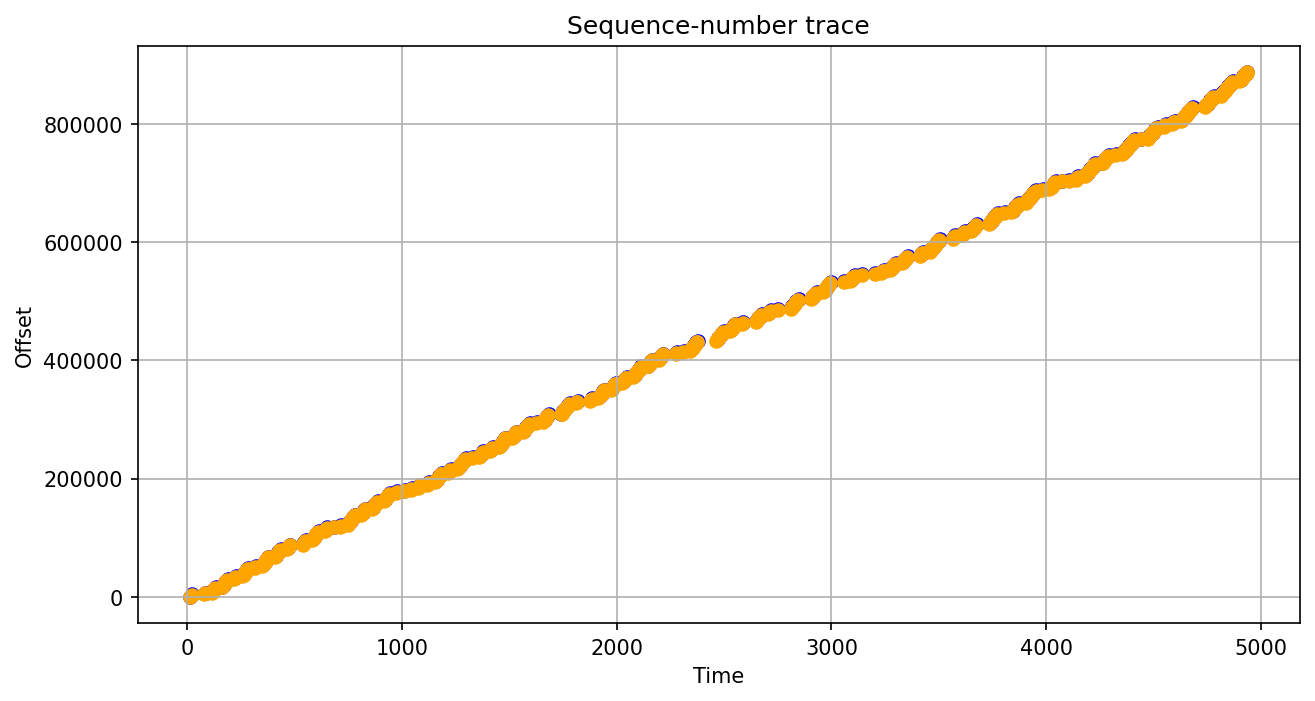

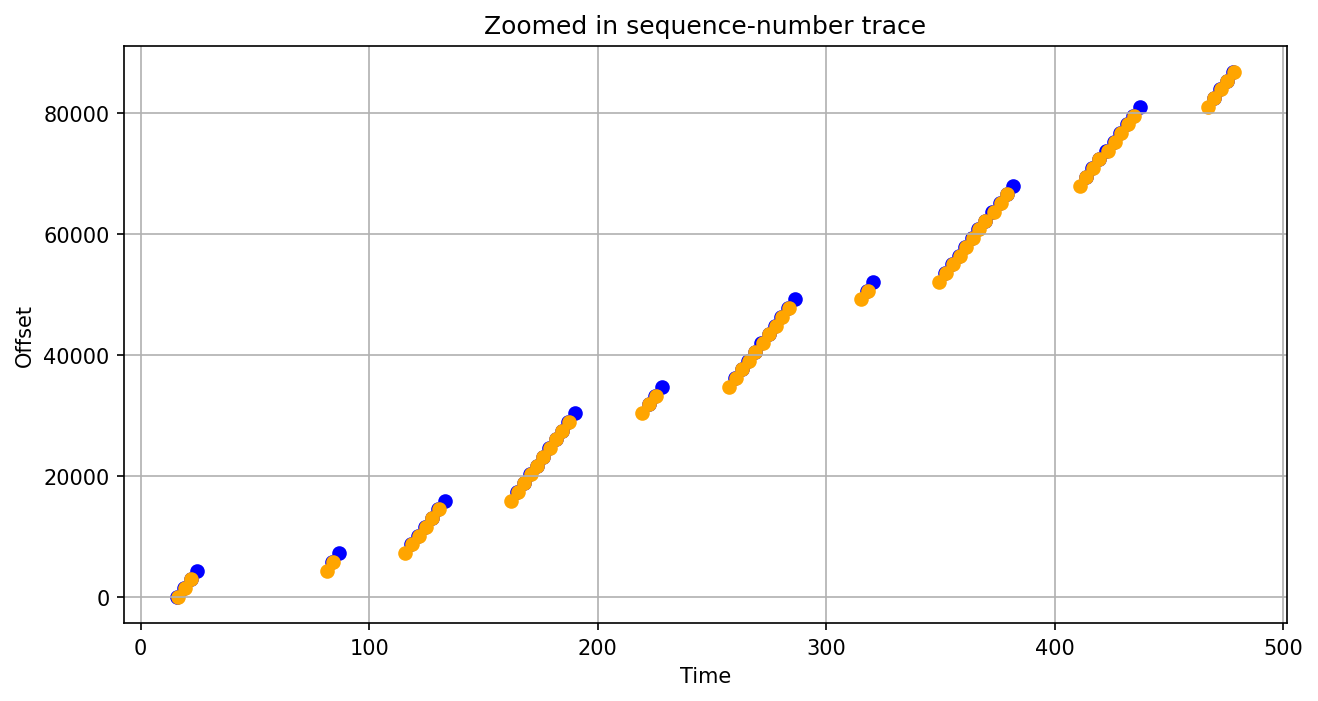

In [4]:

plt.figure(figsize=(10, 5), dpi=150)
graph_time_recv = np.array(graph_time_recv)
graph_time_send = np.array(graph_time_send)
graph_time_recv = graph_time_recv * 1000
graph_time_send = graph_time_send * 1000
plt.scatter(graph_time_send, graph_offset_send, color='blue')
plt.scatter(graph_time_recv, graph_offset_recv, color='orange')
plt.xlabel("Time")
plt.ylabel("Offset")
plt.title("Sequence-number trace")
plt.grid()
plt.savefig("Sequence-number trace.jpeg")
plt.show()

zoom = len([i for i in graph_time_recv if i<500])
plt.figure(figsize=(10, 5), dpi=150)
plt.scatter(graph_time_send[:zoom], graph_offset_send[:zoom], color='blue')
plt.scatter(graph_time_recv[:zoom], graph_offset_recv[:zoom], color='orange')
plt.xlabel("Time")
plt.ylabel("Offset")
plt.title("Zoomed in sequence-number trace")
plt.grid()
plt.savefig("Zoomed in sequence-number trace.jpeg")
plt.show()